In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install xlrd


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 96.5/96.5 kB 394.0 kB/s eta 0:00:00


In [2]:
df = pd.read_excel("data_students.xls", sheet_name="Training_Data")
df.head()

,STG,SCG,STR,LPR,PEG,Unnamed: 5,Unnamed: 6,Attribute Information:
0,0.08,0.08,0.10,0.24,0.90,NaN,NaN,STG (The degree of study time for goal object ...
1,0.06,0.06,0.05,0.25,0.33,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.10,0.10,0.15,0.65,0.30,NaN,NaN,STR (The degree of study time of user for rela...
3,0.08,0.08,0.08,0.98,0.24,NaN,NaN,LPR (The exam performance of user for related ...
4,0.09,0.15,0.40,0.10,0.66,NaN,NaN,PEG (The exam performance of user for goal obj...


In [3]:
df.shape

(402, 8)

In [4]:
df = df.loc[:, ["STG", "SCG", "STR", "LPR", "PEG"]]
df.describe()

,STG,SCG,STR,LPR,PEG
count,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.354020,0.356826,0.458794,0.432415,0.457495
std,0.211546,0.215064,0.245929,0.256962,0.266131
min,0.000000,0.000000,0.010000,0.000000,0.000000
25%,0.200000,0.200000,0.270000,0.250000,0.250000
50%,0.302500,0.300000,0.445000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     402 non-null    float64
 1   SCG     402 non-null    float64
 2   STR     402 non-null    float64
 3   LPR     402 non-null    float64
 4   PEG     402 non-null    float64
dtypes: float64(5)
memory usage: 15.8 KB


In [6]:
df.isna().sum()

STG    0
SCG    0
STR    0
LPR    0
PEG    0
dtype: int64

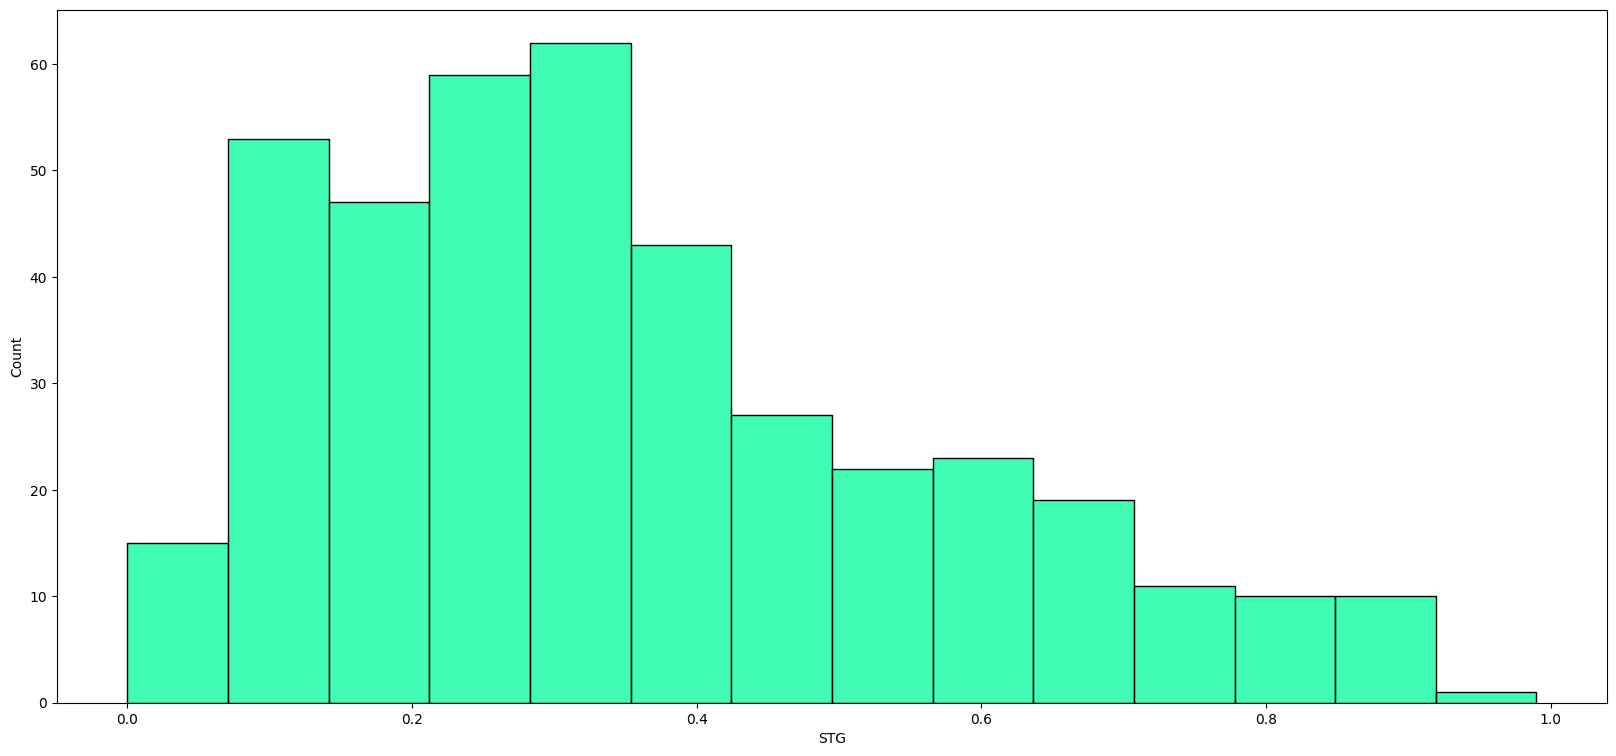

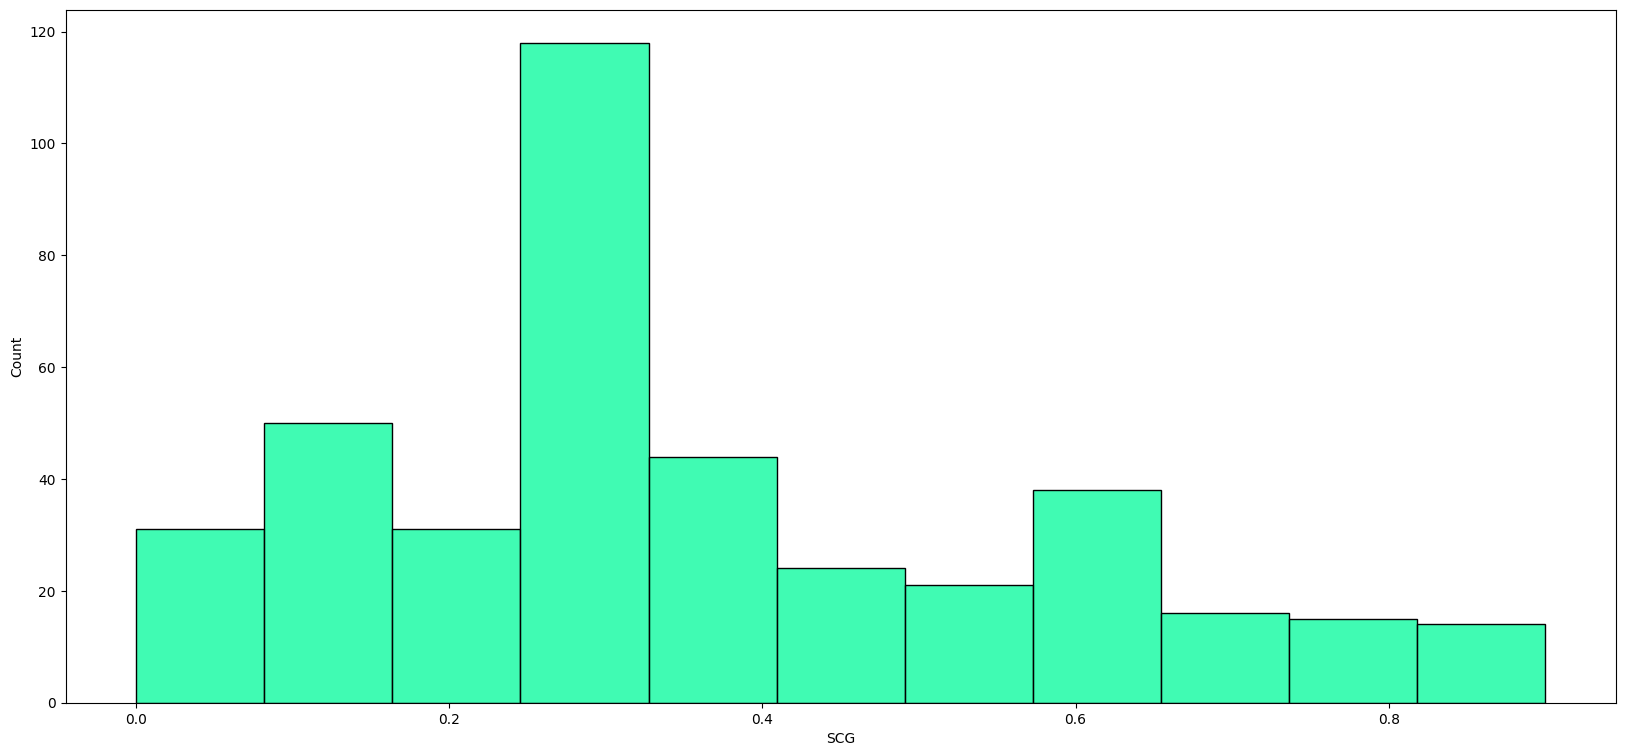

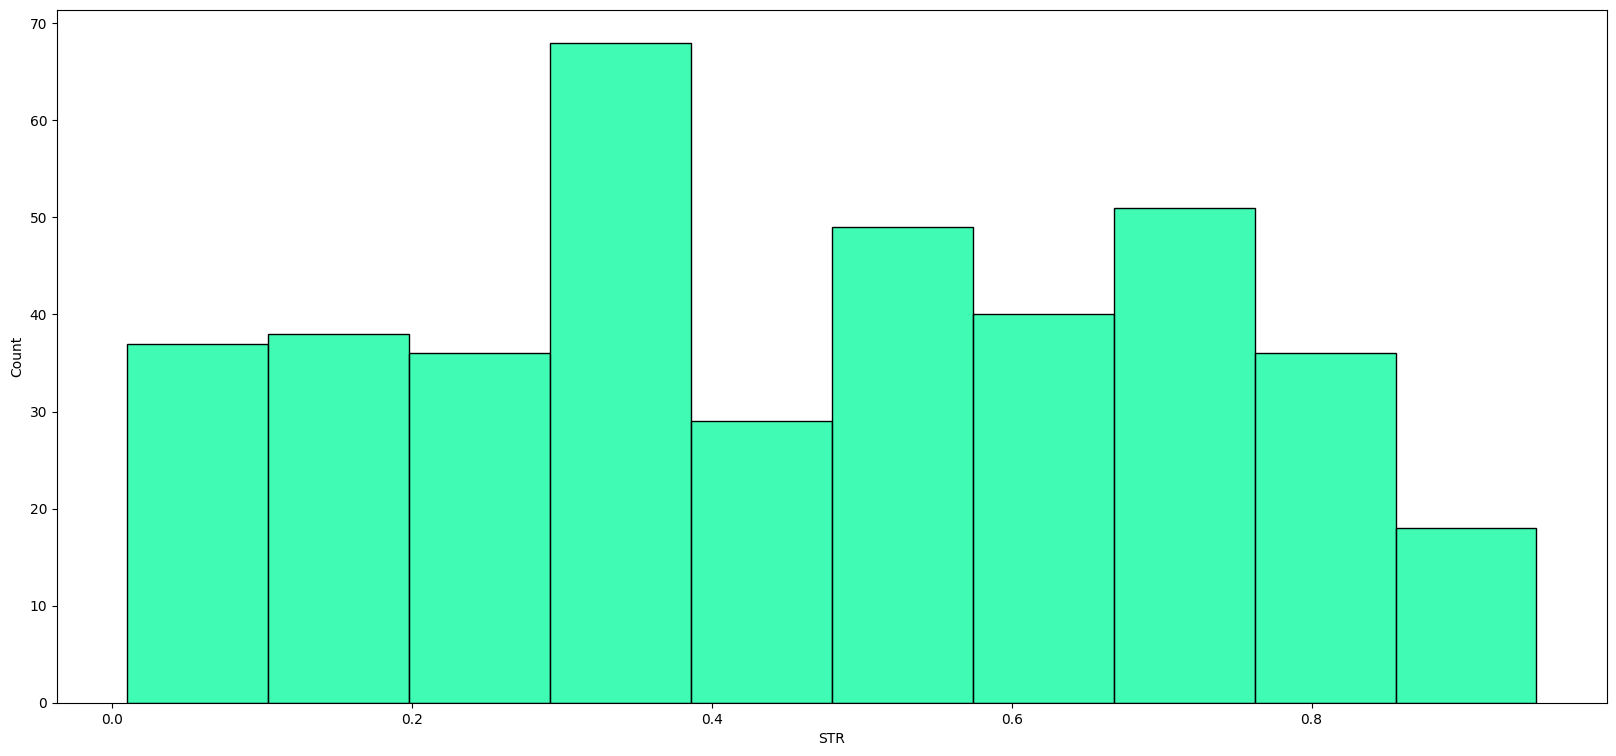

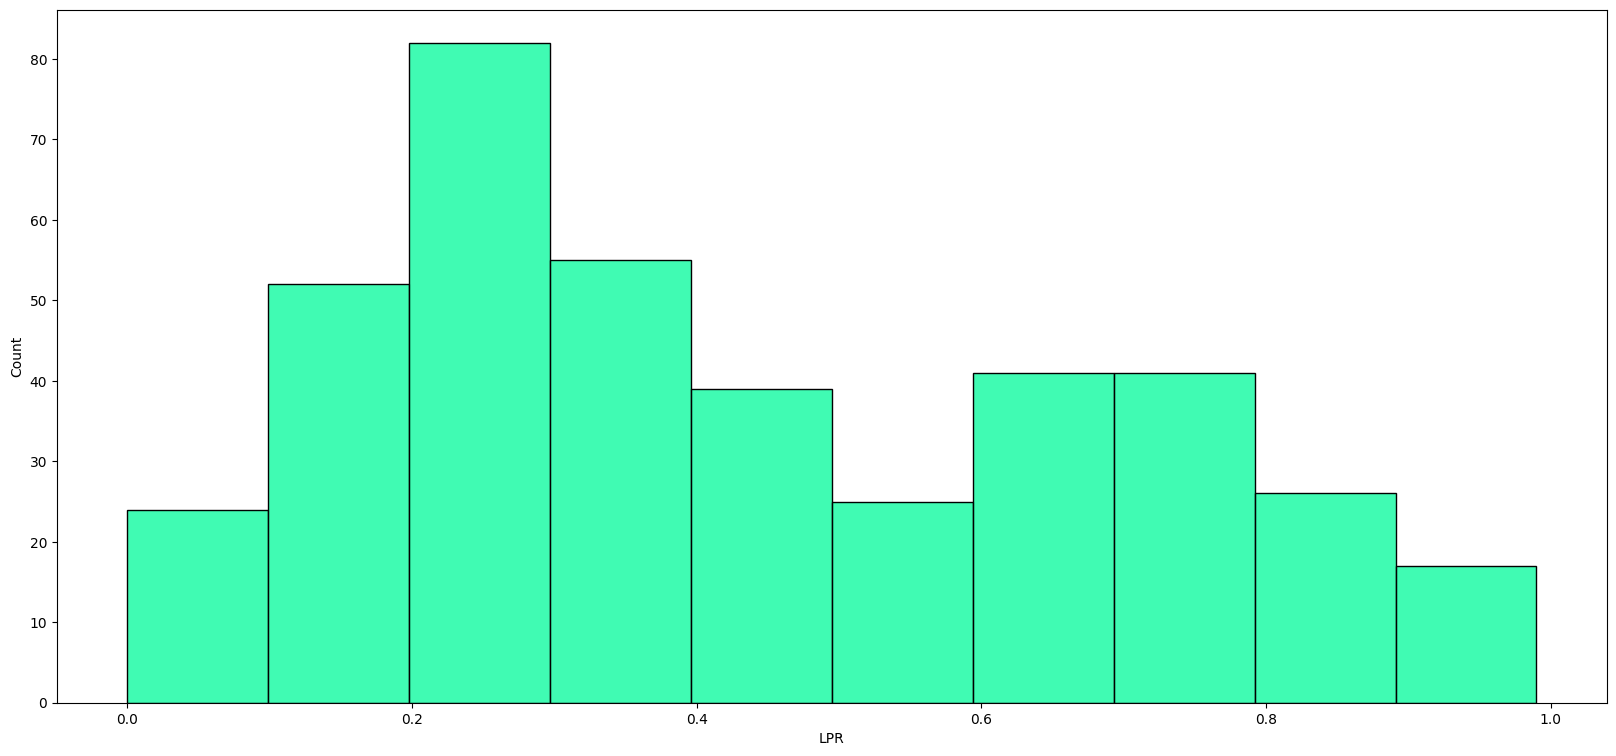

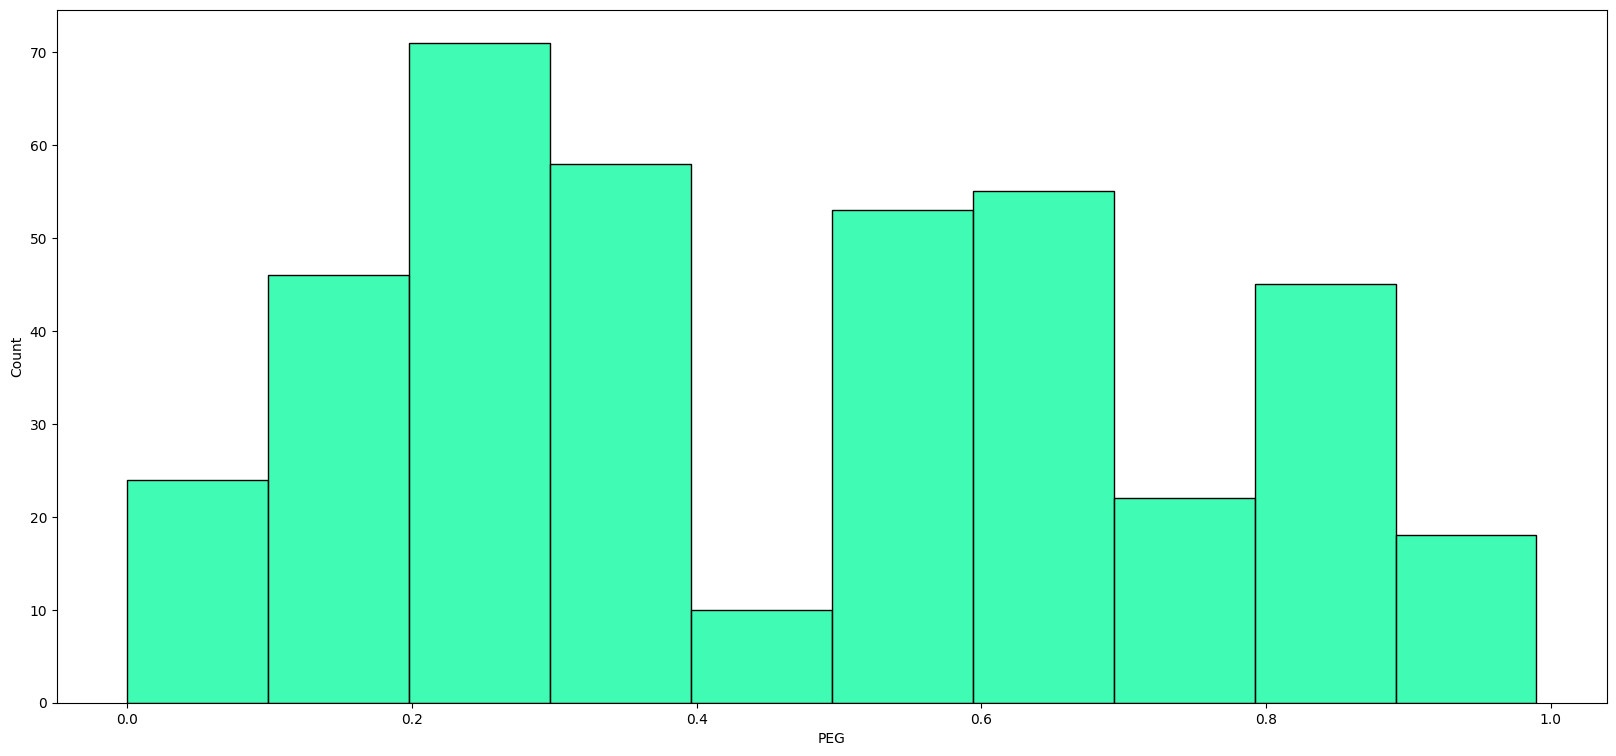

In [7]:
for col in df.columns:
    plt.figure(figsize=(20,9))
    sns.histplot(df[col], color="mediumspringgreen")
    plt.show()

<AxesSubplot: >

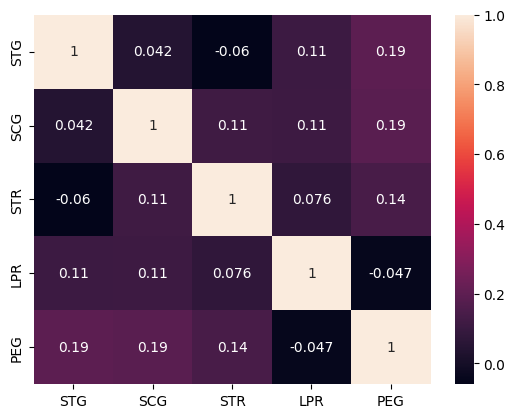

In [8]:
sns.heatmap(data=df.corr(), annot=True)

In [11]:
from sklearn.cluster import DBSCAN

In [173]:
dbscan = DBSCAN(eps=0.4, min_samples=9).fit(df)

In [174]:
pd.Series(dbscan.labels_).unique()

array([ 0, -1], dtype=int64)

In [18]:
dbscan.components_[:3]

array([[0.08, 0.08, 0.1 , 0.24, 0.9 ],
       [0.06, 0.06, 0.05, 0.25, 0.33],
       [0.1 , 0.1 , 0.15, 0.65, 0.3 ]])

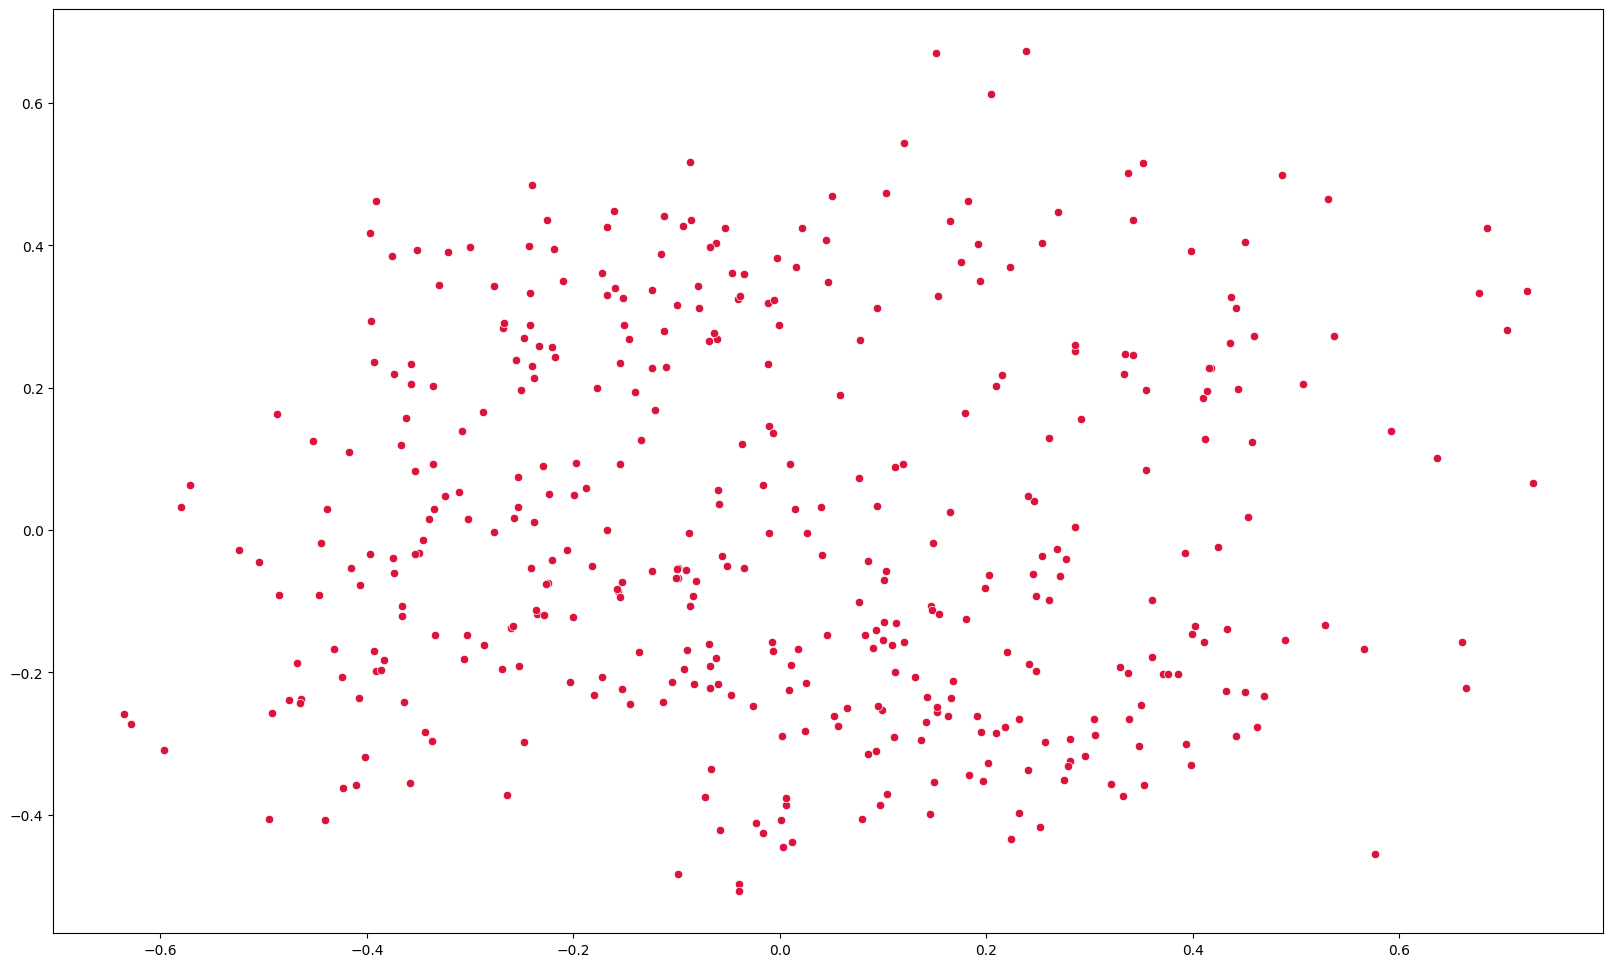

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df)
plt.figure(figsize=(20,12))
sns.scatterplot(x=pca_df[:,0], y=pca_df[:,1], color="crimson")
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 402 samples in 0.001s...
[t-SNE] Computed neighbors for 402 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 402 / 402
[t-SNE] Mean sigma: 0.206229
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.885349
[t-SNE] KL divergence after 1000 iterations: 0.826916


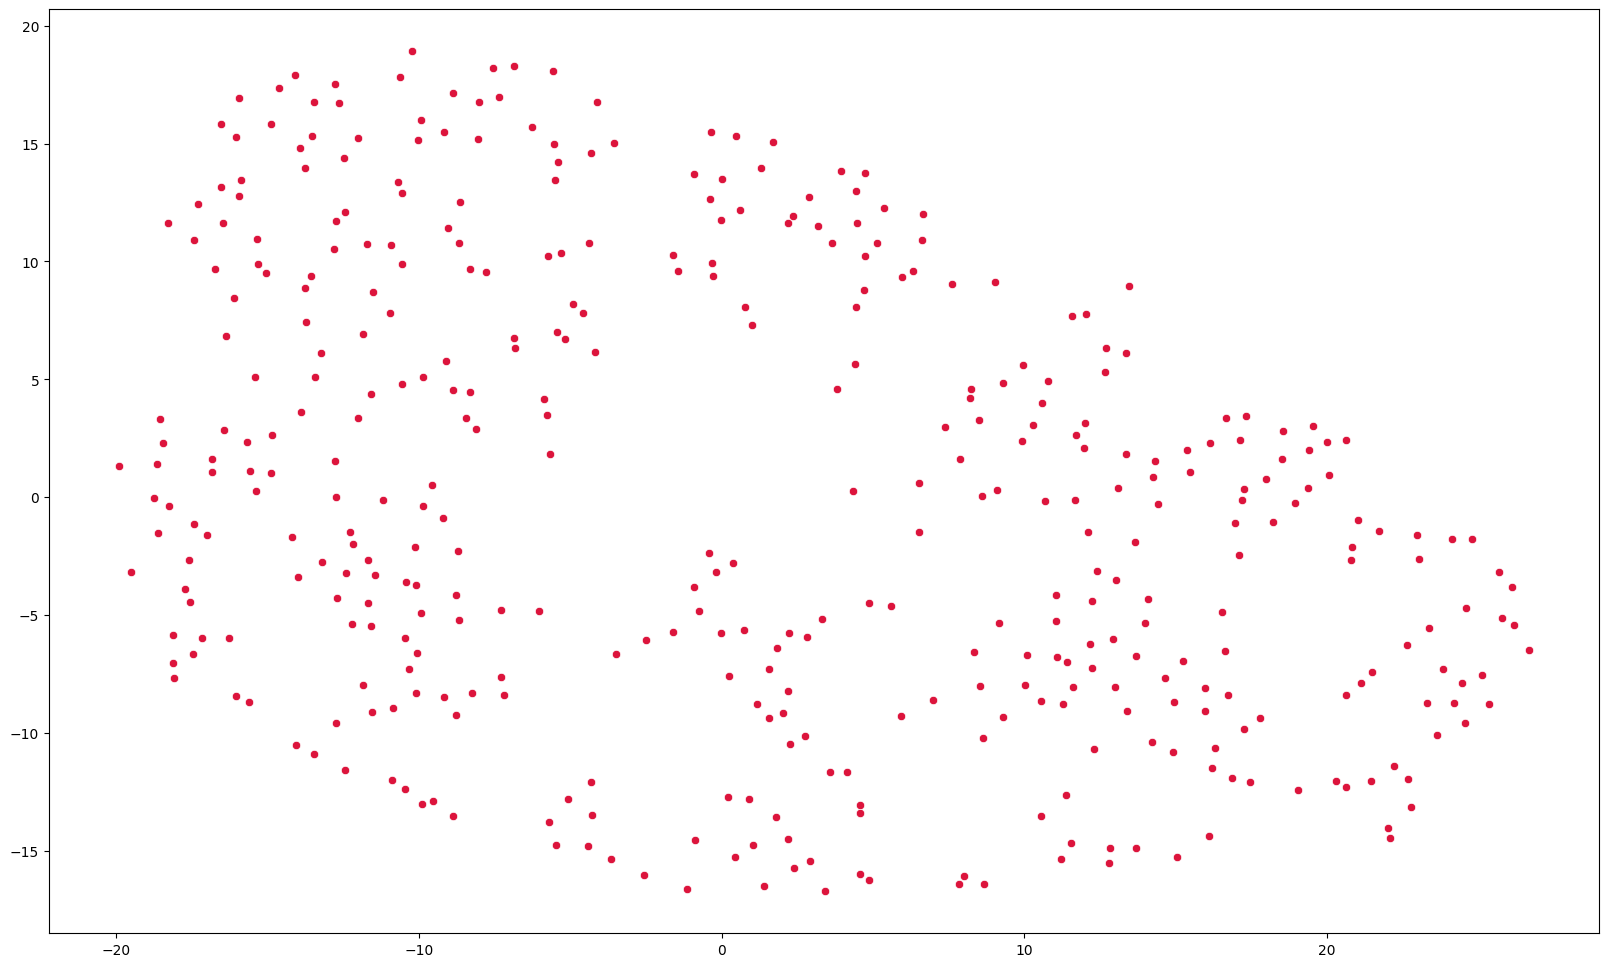

In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, random_state=123)
tsne_df = tsne.fit_transform(df)
plt.figure(figsize=(20,12))
sns.scatterplot(x=tsne_df[:,0], y=tsne_df[:,1], color="crimson")
plt.show()

In [35]:
!pip install umap-learn

     -------------------------------------- 88.2/88.2 kB 416.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 78.5/78.5 kB 874.7 kB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82909 sha256=9dbf5795a25ed658ec2081e850a56e91889bb72623847a1b3124ae78883a16fd
  Stored in directory: c:\users\aghebati.pc\appdata\local\pip\cache\wheels\a0\e8\c6\a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55547 sha256=e6ba3b3ee202c69c9986b51909496c21e51f6d208e6573d17669a5487a28bd51
  Stored in directory: c:\users\aghebati.pc\appdata\local\pip\cache\wheels\f8\5c\b4\a06301605095861524c1c


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


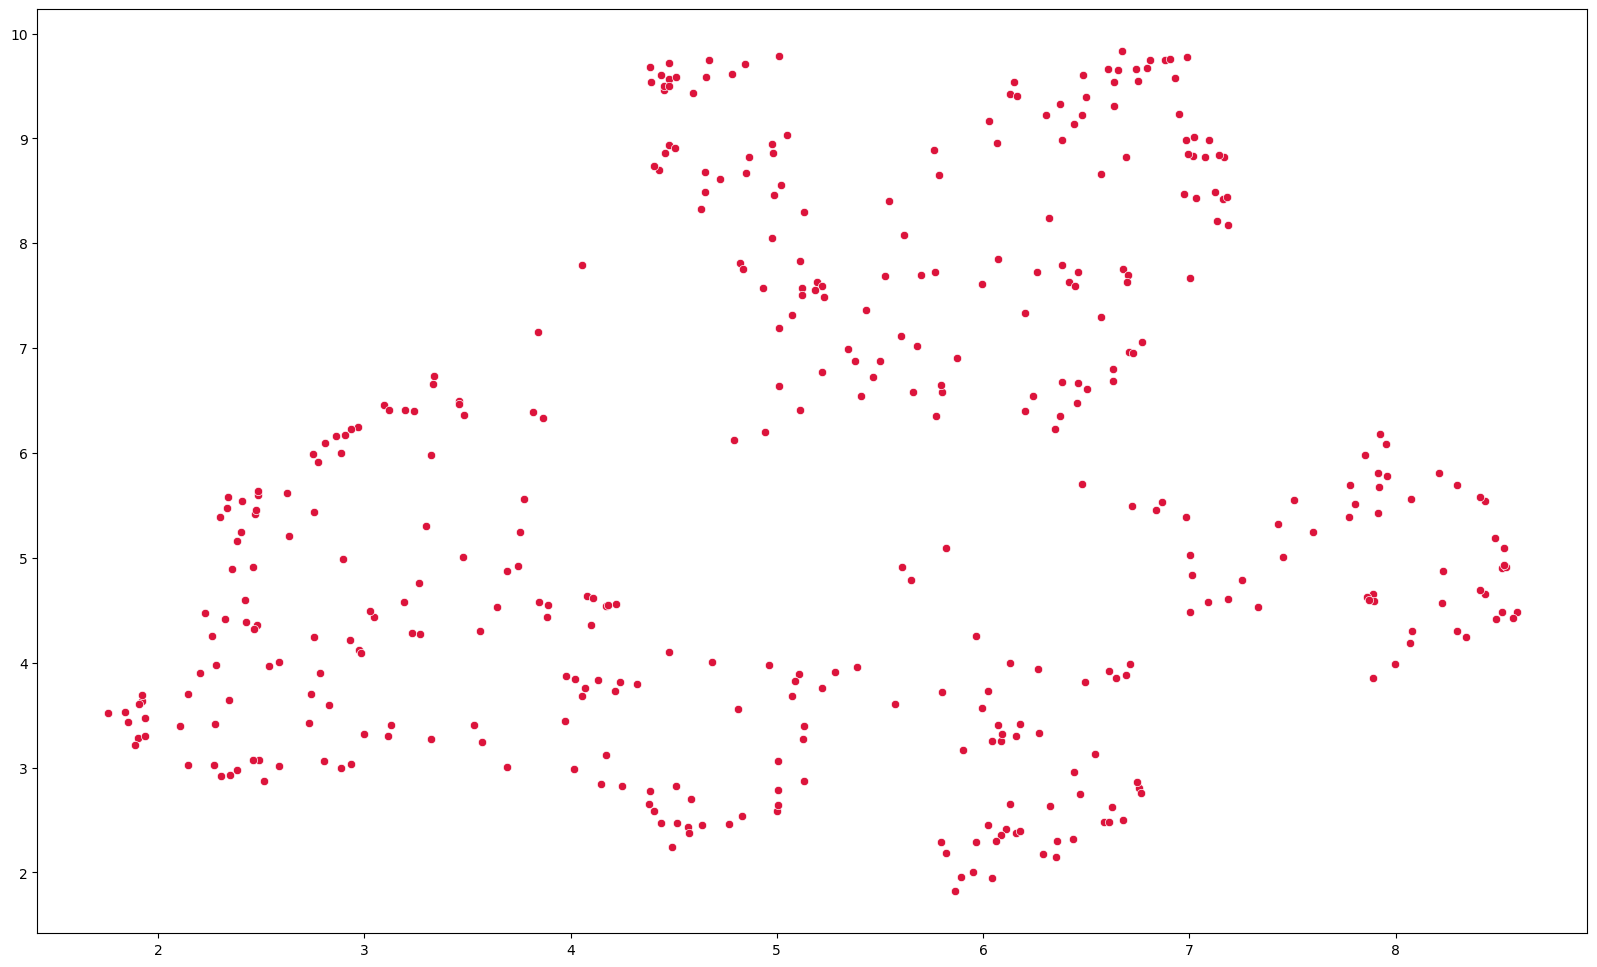

In [40]:
from umap import UMAP
umap = UMAP(random_state=42)
embedding = umap.fit_transform(df)
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], color="crimson")
plt.show()

In [158]:
dbscan = DBSCAN(eps=0.3, min_samples=9).fit(df)
pd.Series(dbscan.labels_).unique()

array([-1,  0,  1], dtype=int64)

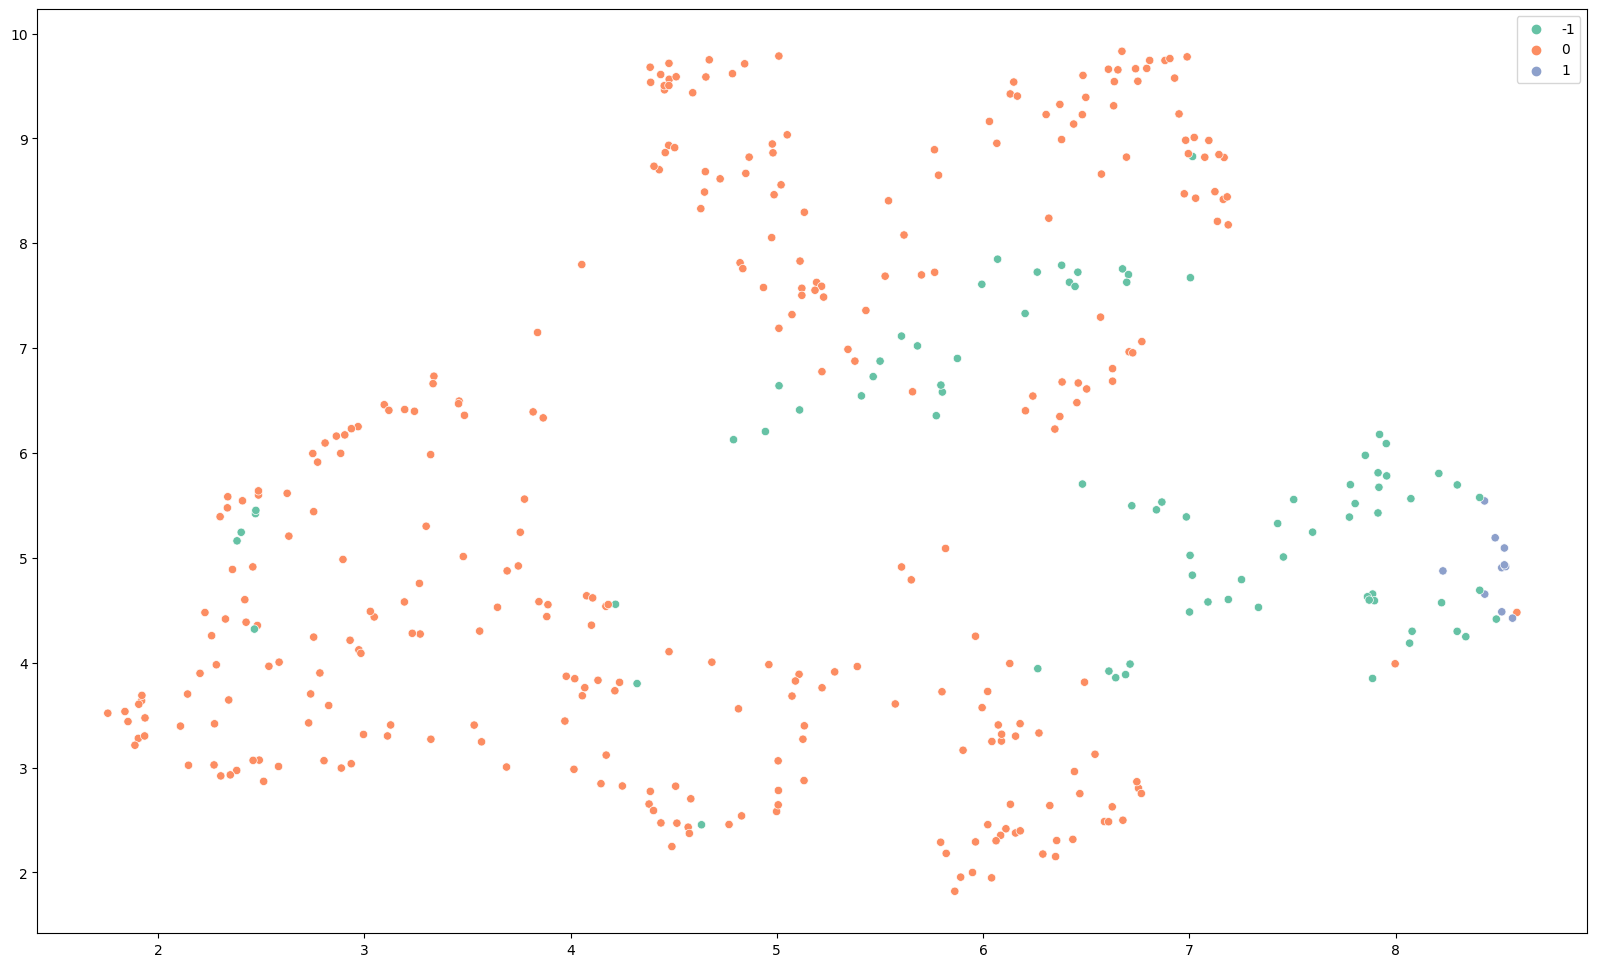

In [159]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=dbscan.labels_, 
                palette="Set2")
plt.show()

In [160]:
cluster_labels = pd.Series(dbscan.labels_)
cluster_labels.value_counts()

 0    311
-1     81
 1     10
dtype: int64

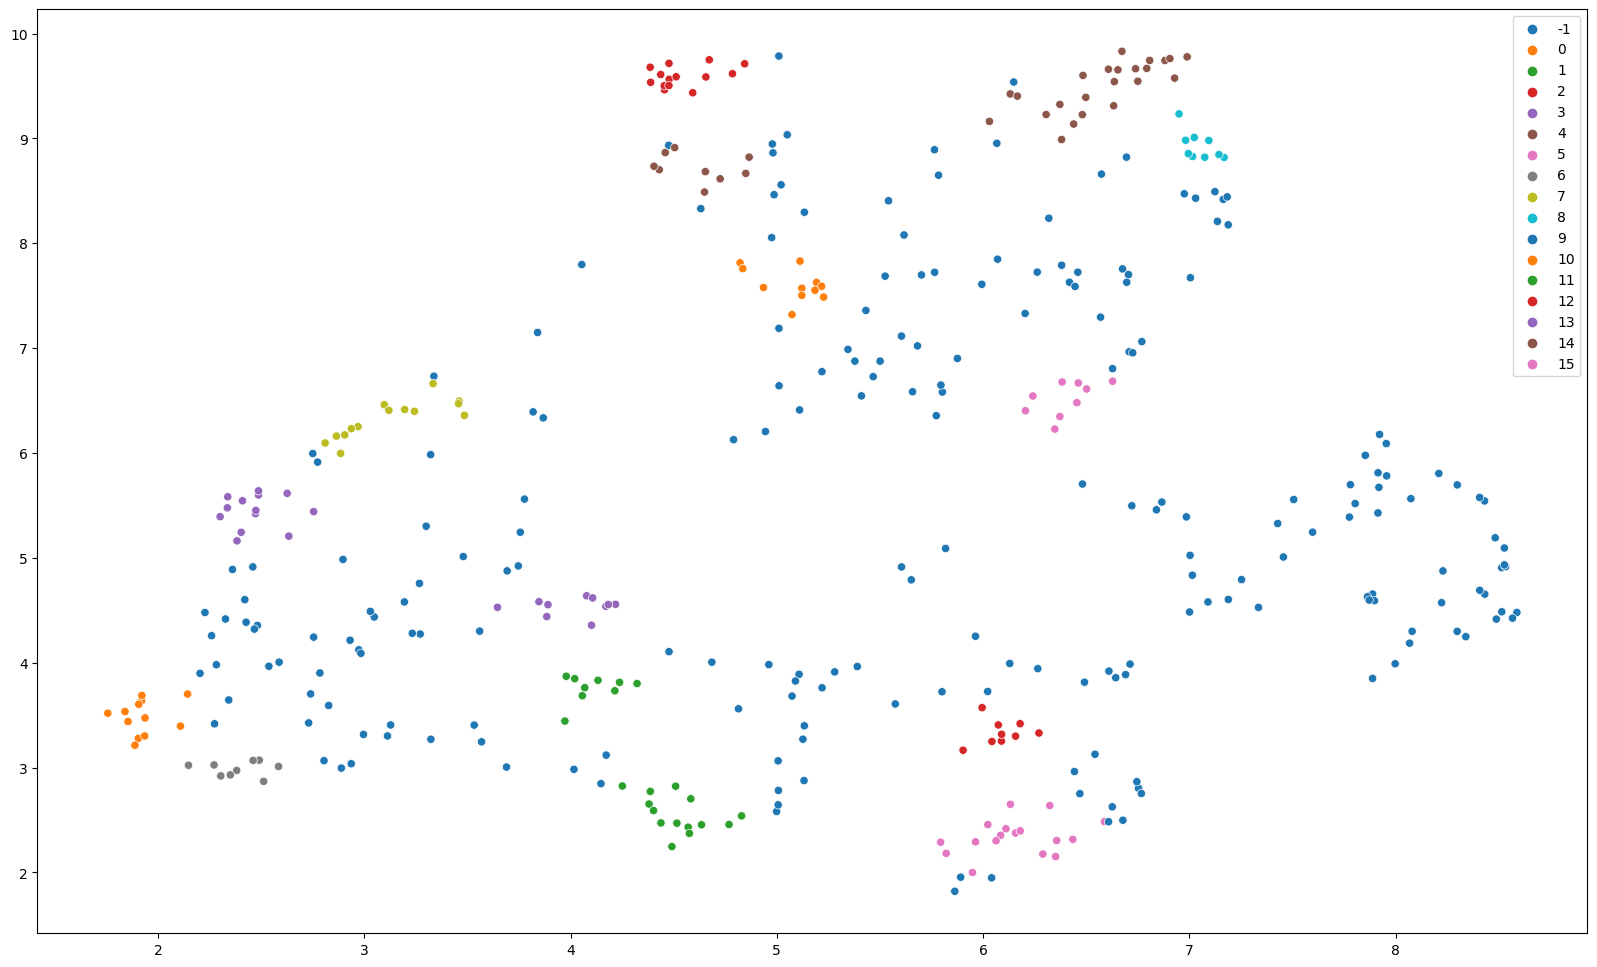

In [179]:
dbscan = DBSCAN(eps= 0.3, min_samples=9).fit(embedding)
plt.figure(figsize=(20,12))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=dbscan.labels_, palette="tab10")
plt.show()

In [180]:
cluster_labels = pd.Series(dbscan.labels_)
cluster_labels.value_counts()

-1     209
 4      23
 5      17
 1      14
 2      14
 7      14
 3      13
 0      12
 9      11
 10     11
 13     10
 15      9
 6       9
 11      9
 14      9
 12      9
 8       9
dtype: int64

In [168]:
outlier_percent = [] 

for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=9)
    dbscan.fit(df)
   
    # Percentage of points that are outliers
    perc_outliers =100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)
    

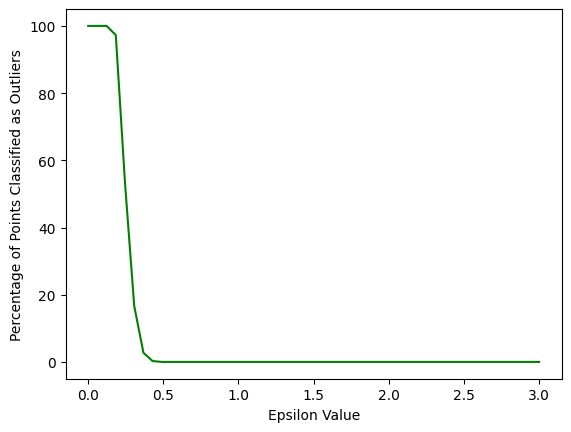

In [167]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent, color='green')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value");

In [172]:
dbscan = DBSCAN(eps=0.2,min_samples=9)
dbscan.fit(df)
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,
        0, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  0,  0, -1, -1, -1,  0,
       -1, -1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [164]:
db=DBSCAN(eps=0.4,min_samples=20,metric='euclidean')


In [165]:
model=db.fit(x)
label=model.labels_
label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [175]:
clustering = DBSCAN(eps = 0.3, min_samples = 5).fit(x)
cluster = clustering.labels_

In [107]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 4


In [1]:
from sklearn.cluster import SpectralClustering